<a href="https://colab.research.google.com/github/satishgunjal/Machine-Learning-Using-Python/blob/master/01_Linear_Regression/Linear_Regression_One_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [0]:
# Below code will work in case Jupytor is running locally and files are on same PC
#df = pd.read_csv('homeprices.csv')
#df

In [4]:
from google.colab import files
uploaded = files.upload()

Saving homeprices.csv to homeprices.csv


In [5]:
import io

df = pd.read_csv(io.StringIO(uploaded['homeprices.csv'].decode('utf-8')))
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [0]:
# Lets plot scatter plot using 'matplotlib' library

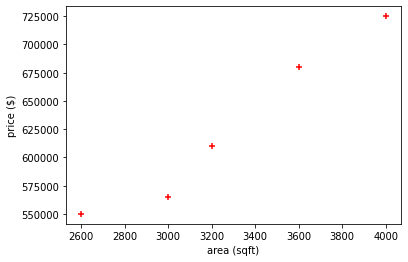

In [7]:
plt.xlabel('area (sqft)')
plt.ylabel('price ($)')
plt.scatter(df.area,df.price, color = 'red', marker = '+')

fit(X, Y) => X and Y need to be two-dimensional arrays of shape (n_samples, n_features) and (n_sample, n_targets) respectively

In [38]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price) # training the model with data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**reg.coef_:** Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.


In [29]:
reg.coef_

array([[135.78767123]])

**reg.intercept_:**Independent term in the linear model. Set to 0.0 if fit_intercept = False.

In [30]:
reg.intercept_

array([180616.43835616])

1.   Linear regression equation is y = mx + b (where m is slope/gradient/coefficient, b = Y intercept)
2.   So in our case price = (coef_ * area) + intercept_

Lets calculate the price of the house with area 3300



In [31]:
(135.78767123 * 3300) + 180616.43835616

628715.75341516

We can crosscheck the result with 'predict' method from linear module

In [41]:
reg.predict([[3300]])

array([628715.75342466])

Now lets predict the price of a home with area = 5000 sqr ft

In [42]:
reg.predict([[5000]])

array([859554.79452055])

Similarly we can also see the prediction for every value from our dataset. We can use these predictions and plot it against out data to visualize the best line fit

In [54]:
predictions = reg.predict(df[['area']])
predictions

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

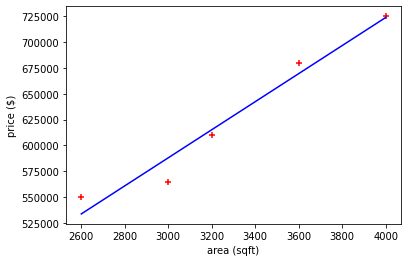

In [56]:
plt.xlabel('area (sqft)')
plt.ylabel('price ($)')
plt.scatter(df.area,df.price, color = 'red', marker = '+')
plt.plot(df.area,predictions, color = 'blue')

**Task#1:**
Predict the home prices for each entry in 'area.csv' file and export the final result in CSV file

In [43]:
uploaded_t = files.upload()

Saving areas.csv to areas.csv


In [46]:
# Below code will work in case Jupytor is running locally and files are on same PC
#area_df = pd.read_csv('areas.csv')

area_df = pd.read_csv(io.StringIO(uploaded_t['areas.csv'].decode('utf-8')))
area_df.head(3) # display only first three records

,area
0,1000
1,1500
2,2300


In [49]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

Now create a separate column 'prices' in dataframe 'area_df'

In [50]:
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


Now we can convert the dataframe area_df to CSV

In [0]:
area_df.to_csv('predictions.csv', index = False)

#Exercise
Predict canada's per capita income in year 2020. Use CSV 'exercise_canada_per_capita_income.csv' to build a regression model and predict the per capita income fo canadian citizens in year 2020.

**Step#1**: Locad the data into pandas dataframe

In [57]:
uploaded_e = files.upload()

Saving exercise_canada_per_capita_income.csv to exercise_canada_per_capita_income.csv


In [61]:
e_df = pd.read_csv(io.StringIO(uploaded_e['exercise_canada_per_capita_income.csv'].decode('utf-8')))
e_df.head(3) # show only three records

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


**Step#2:** Plot the scatter plot to visualize the data

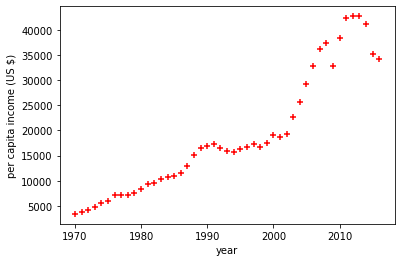

In [72]:
plt.xlabel('year')
plt.ylabel('per capita income (US $)')
plt.scatter(e_df.year,e_df['per capita income (US$)'], color = 'red', marker = '+')

#note here, since column name 'per capita income (US$)' has space and special character in it we are different way to refer it

**Step#3:** Train the linear regression model

In [76]:
e_reg = linear_model.LinearRegression()
e_reg.fit(e_df[['year']],e_df['per capita income (US$)']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step#4:** Note the coeffient and intercept

In [77]:
e_reg.coef_

array([828.46507522])

In [79]:
e_reg.intercept_

-1632210.7578554575

**Step#5:** Lets check the prediction for year 2020

In [85]:
e_reg.predict([[2020]])

# y = m * x - b (i.e. coef_ * 2020 - intercept_) 
# y = 828.46507522 * 2020 - 1632210.7578554575

array([41288.69409442])

**Step#6:** Since our answer is correct lets visualize out predictions against our data.*italicized text*

In [90]:
predictions = e_reg.predict(e_df[['year']])
predictions

array([ -134.55966672,   693.9054085 ,  1522.37048373,  2350.83555895,
        3179.30063417,  4007.7657094 ,  4836.23078462,  5664.69585984,
        6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 10635.48631118, 11463.9513864 , 12292.41646162,
       13120.88153685, 13949.34661207, 14777.81168729, 15606.27676251,
       16434.74183774, 17263.20691296, 18091.67198818, 18920.1370634 ,
       19748.60213863, 20577.06721385, 21405.53228907, 22233.9973643 ,
       23062.46243952, 23890.92751474, 24719.39258996, 25547.85766519,
       26376.32274041, 27204.78781563, 28033.25289085, 28861.71796608,
       29690.1830413 , 30518.64811652, 31347.11319175, 32175.57826697,
       33004.04334219, 33832.50841741, 34660.97349264, 35489.43856786,
       36317.90364308, 37146.3687183 , 37974.83379353])

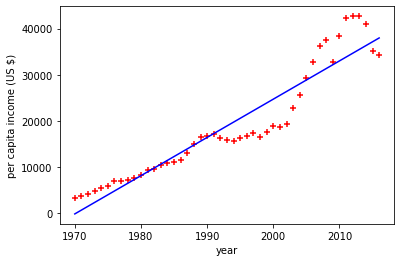

In [91]:
plt.xlabel('year')
plt.ylabel('per capita income (US $)')
plt.scatter(e_df.year,e_df['per capita income (US$)'], color = 'red', marker = '+')
plt.plot(e_df.year,predictions, color = 'blue')